In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import re
%matplotlib inline

In [199]:
file_name = 'Seattle_Police_Department_911_Incident_Response.csv'
df = pd.read_csv(file_name, header=0, sep=',', low_memory=False)
df.rename(columns=lambda x : re.sub('\/|\s', '_', x), inplace=True)

In [200]:
df.shape

(1385790, 19)

In [201]:
data = df.dropna()

In [202]:
# create month/year column
at_scene_time_m_y = pd.DatetimeIndex(at_scene_time).map(lambda x: x.strftime('%Y-%m'))
data['At_Scene_Time_M_Y'] = at_scene_time_m_y


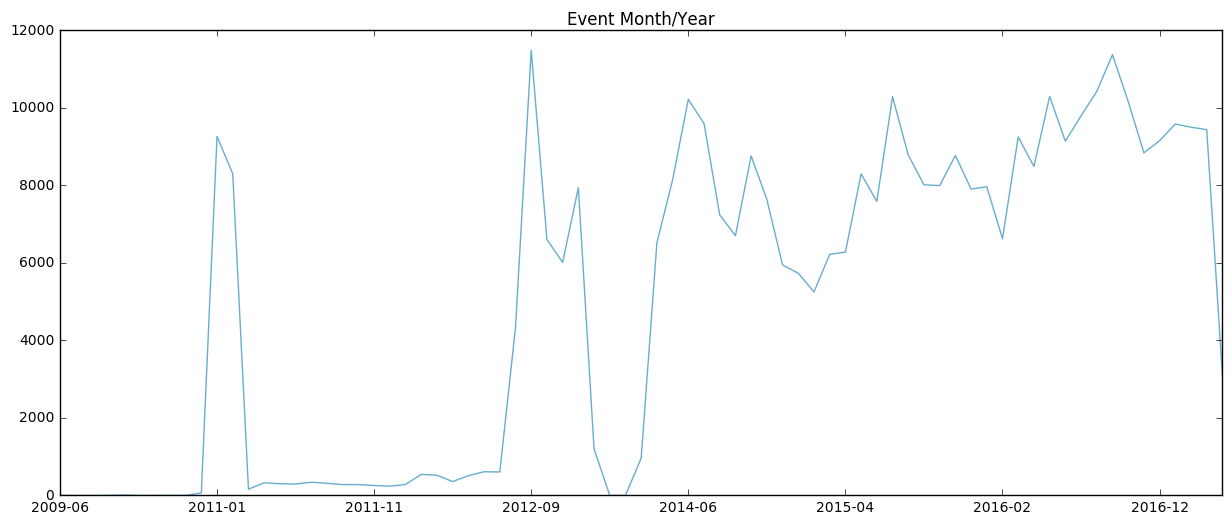

In [203]:
data['At_Scene_Time_M_Y'].value_counts().sort_index().plot(figsize=(15, 6), 
                                                  color='#67aecc', 
                                                 title='Event Month/Year');

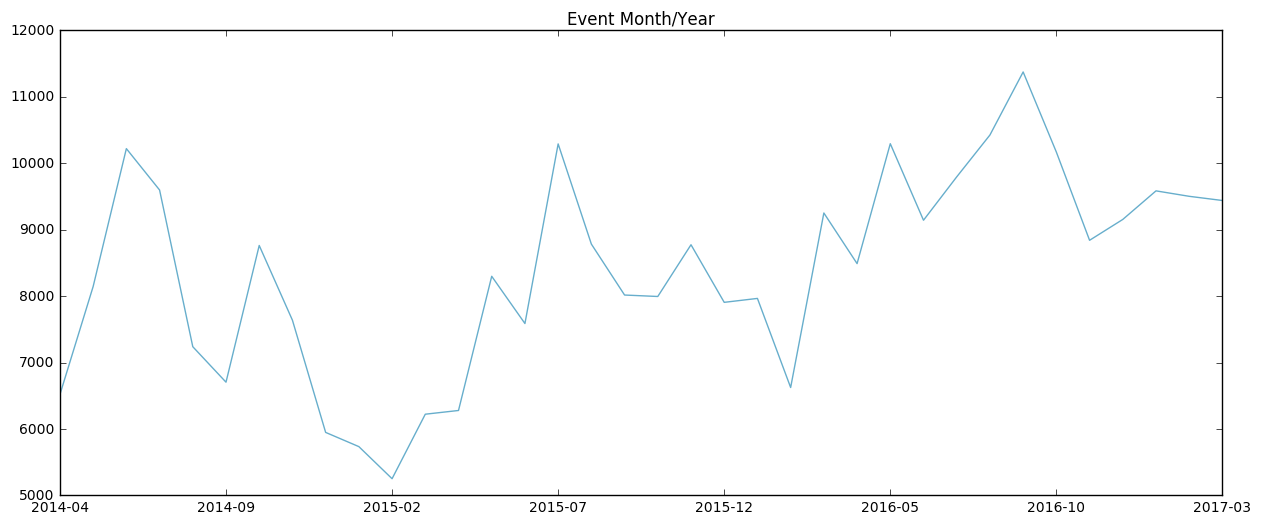

In [204]:
# The count of events from 2014-04 to 2017-03, 3 years
mask = (data['At_Scene_Time_M_Y'] > '2014-03') & (data['At_Scene_Time_M_Y'] < '2017-04') 
data = data.loc[mask]
data['At_Scene_Time_M_Y'].value_counts().sort_index().plot(figsize=(15, 6), 
                                                  color='#67aecc', 
                                                 title='Event Month/Year');

In [246]:
count = data['At_Scene_Time_M_Y'].value_counts().sort_index()

date = sorted(data['At_Scene_Time_M_Y'].unique())


In [247]:
# convert datetime to ordinal numbers for training
import datetime as dt

date = pd.to_datetime(date)

date = date.map(dt.datetime.toordinal)


[[735658]
 [735354]
 [736055]
 [735385]
 [736330]
 [735415]
 [736299]
 [736024]
 [736146]
 [735630]
 [735995]
 [735872]
 [736085]
 [735507]
 [735933]
 [735538]
 [735750]
 [736177]]
Coefficients: 
 [ 1.35756197]
Mean squared error: 1674024.95
Variance score: 0.32


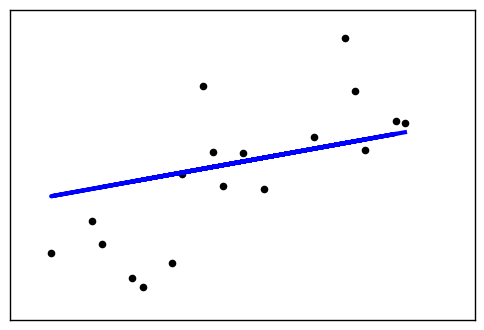

In [243]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = count
X = np.asarray(date)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=42)
X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
# y_train = pd.DataFrame(y_train)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) #train model on train data


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

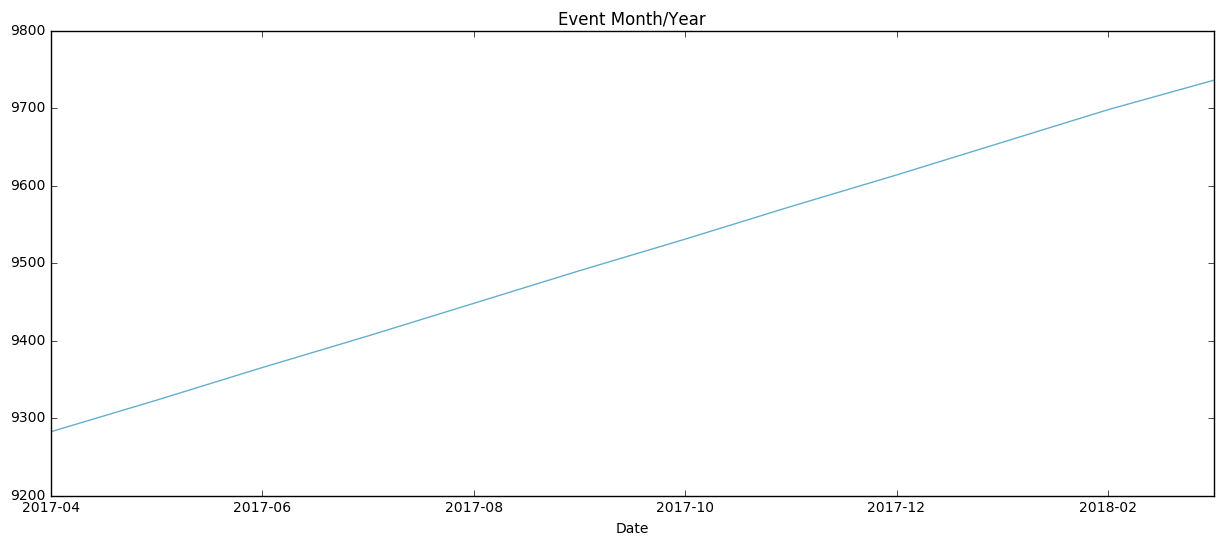

In [278]:
# predict 

year_17_to_18 = ["2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12","2018-01",
                "2018-02","2018-03"]

prediction_yr = [dt.datetime.strptime(time,"%Y-%m") for time in year_17_to_18]
prediction_yr = np.asarray([dt.datetime.toordinal(x) for x in prediction_yr])


events = regr.predict(prediction_yr.reshape(len(year_17_to_18), 1))

pred = {}
i = 0
for month in year_17_to_18:
    pred[month] = events[i]
    i += 1
    
pred = pd.Series(pred, name='DateValue')
pred.index.name = 'Date'
pred.plot(figsize=(15, 6),  color='#67aecc', title='Event Month/Year');

In [ ]:
# Histogram
data.plot(x = 'Longitude', y = 'Latitude', kind = 'scatter', figsize = (8, 10), s = 0.005);

In [ ]:
xs = np.array(data[[12]])
ys = np.array(data[[13]])

In [ ]:
xmin = xs.min()
xmax = xs.max()
ymin = ys.min()
ymax = ys.max()

fig, ax = plt.subplots(figsize=(8, 10))

hb = ax.hexbin(xs, ys, gridsize=333, bins='log', cmap='inferno')
# hb = ax.hexbin(xs, ys, gridsize=300, bins='log', cmap='gnuplot')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

In [ ]:
# plot the frequency of incidents in a day
at_scene_time = data['At_Scene_Time']

# convert the datetime to 24 hour format
at_scene_time = pd.to_datetime(at_scene_time, format='%m/%d/%Y %I:%M:%S %p')
at_scene_time_hourly = at_scene_time.dt.strftime('%H')
at_scene_time_hourly = pd.to_numeric(at_scene_time_hourly)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(x = at_scene_time_hourly, bins=24, color='#67aecc', edgecolor='none',rwidth = 0.5, range = (0, 23))
ax.set_xticks(np.linspace(0.5,22.5,24)) 
ax.set_xticklabels(tuple(x for x in range(24))) 
ax.set_title("Hourly Incident Response")
ax.grid(axis = 'y')

In [ ]:
# Event Clearance Group count
data['Event_Clearance_Group'].value_counts().plot(kind="bar", figsize=(15, 6), 
                                                  color='#67aecc', edgecolor='none',
                                                 title='Event Clearance Group');

In [ ]:
data['Zone_Beat'].value_counts().plot(kind = "bar", figsize= (15, 6), 
                                      color = '#67aecc', edgecolor='none',
                                     title='Zone_Beat');

In [ ]:
# convert the datetime to 10 minutes interval and add it to dataset as a new column 
pd.options.mode.chained_assignment = None  # default='warn'

at_scene_time_minute = pd.DatetimeIndex(at_scene_time).round('10min')
at_scene_time_minute = at_scene_time_minute.strftime('%H:%M')
data['At_Scene_Time_Minute'] = at_scene_time_minute
data['At_Scene_Time_Minute'].head()

In [ ]:
# create month/year column
at_scene_time_m_y = pd.DatetimeIndex(at_scene_time).map(lambda x: x.strftime('%Y-%m'))
data['At_Scene_Time_M_Y'] = at_scene_time_m_y

data.head()

In [ ]:
# Generate the association rules from a list of frequent itemsets.
H = generate_rules(F, support_data, min_confidence=0.2, verbose=True)